In [1]:
import os, sys

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('preprocessed_train.csv', encoding='euc-kr')
test = pd.read_csv('preprocessed_test.csv', encoding='euc-kr')

In [3]:
train = train.drop(columns=['분석데이터'], axis=1)

In [4]:
test = test.drop(columns=['분석대상'], axis=1)

In [5]:
train

,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,144,12.298611,1771,5.356616,0,0,0,1,2399,...,10,4,10,9,4,0,1,0,0,0
1,1,804,9.580846,7703,6.063542,0,0,0,6,183376,...,43,121,84,78,47,36,40,45,27,36
2,0,2205,12.736054,28083,6.107050,9,0,0,6,1178,...,326,268,239,286,199,148,154,37,48,36
3,0,2602,10.288240,26770,5.373013,8,0,0,1,56851,...,336,230,206,245,76,0,26,702,1,5
4,1,8980,23.252339,208806,5.775223,0,28,16,3,124274,...,731,882,1171,1010,322,64,327,84,75,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2018,13.938057,28127,5.940442,0,70,0,11,255044,...,246,186,206,235,88,33,81,58,61,72
9996,0,1105,16.437104,18163,5.766962,0,11,0,3,181296,...,199,57,134,123,20,25,28,25,41,13
9997,0,4,58.500000,234,3.811827,0,0,0,1,68736,...,0,0,0,0,0,0,0,0,0,0
9998,1,3312,24.939312,82599,5.834730,0,39,0,8,90648,...,438,985,806,851,113,123,181,100,75,86


In [6]:
test

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,5063,9.419514,47691,5.630504,6,1,1,11,68704,24061,...,212,4485,451,312,128,159,135,283,101,277
1,5347,15.560875,83204,5.773314,0,2,14,4,4026,1829,...,824,492,1159,574,90,25,47,22,26,27
2,4523,11.875083,53711,6.146246,0,37,0,1,65732,973,...,249,307,372,289,115,90,248,95,118,77
3,6174,7.378037,45552,6.473256,0,1,17,13,30028,1158,...,366,441,363,469,331,272,457,311,320,291
4,22,7.090909,156,5.324630,0,0,0,1,22922,464,...,0,1,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,473,5.835095,2760,6.547591,0,0,0,3,2367,199,...,28,27,33,45,25,27,26,23,26,30
4996,658,9.749240,6415,6.147939,0,9,0,3,30788,5078,...,170,101,83,48,27,22,27,17,19,40
4997,1111,9.737174,10818,5.775273,0,0,0,4,110979,7409,...,65,80,91,96,57,22,22,77,32,36
4998,1664,6.364183,10590,6.495400,0,1,0,6,114572,6942,...,95,103,116,95,62,59,94,54,74,72


In [13]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [14]:
summarize_categoricals(train, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
label,"[1, 0]",2,0
numstrings,"[144, 804, 2205, 2602, 8980, 3312, 21761, 117,...",4830,0
avlength,"[12.298611111111109, 9.58084577114428, 12.7360...",8543,0
printables,"[1771, 7703, 28083, 26770, 208806, 82599, 1274...",7878,0
entropy,"[5.356616020202637, 6.063542366027832, 6.10704...",9494,0
...,...,...,...
dist_91,"[0, 36, 148, 64, 123, 997, 57, 7, 897, 23, 67,...",1232,0
dist_92,"[1, 40, 154, 26, 327, 181, 1134, 0, 139, 18, 1...",1345,0
dist_93,"[0, 45, 37, 702, 84, 100, 852, 23, 8, 759, 10,...",1224,0
dist_94,"[0, 27, 48, 1, 75, 1141, 62, 8, 1209, 76, 281,...",1249,0


In [15]:
train = to_categorical([], train)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 617 entries, label to dist_95
dtypes: float64(2), int64(615)
memory usage: 47.1 MB


In [7]:
x = train.iloc[:, 1:]

In [8]:
y = train['label']

In [18]:
categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

In [19]:
categorical_columns

[]

In [20]:
numeric_columns

['numstrings',
 'avlength',
 'printables',
 'entropy',
 'paths',
 'urls',
 'registry',
 'MZ',
 'a_0',
 'a_1',
 'a_2',
 'a_3',
 'a_4',
 'a_5',
 'a_6',
 'a_7',
 'a_8',
 'a_9',
 'a_10',
 'a_11',
 'a_12',
 'a_13',
 'a_14',
 'a_15',
 'a_16',
 'a_17',
 'a_18',
 'a_19',
 'a_20',
 'a_21',
 'a_22',
 'a_23',
 'a_24',
 'a_25',
 'a_26',
 'a_27',
 'a_28',
 'a_29',
 'a_30',
 'a_31',
 'a_32',
 'a_33',
 'a_34',
 'a_35',
 'a_36',
 'a_37',
 'a_38',
 'a_39',
 'a_40',
 'a_41',
 'a_42',
 'a_43',
 'a_44',
 'a_45',
 'a_46',
 'a_47',
 'a_48',
 'a_49',
 'a_50',
 'a_51',
 'a_52',
 'a_53',
 'a_54',
 'a_55',
 'a_56',
 'a_57',
 'a_58',
 'a_59',
 'a_60',
 'a_61',
 'a_62',
 'a_63',
 'a_64',
 'a_65',
 'a_66',
 'a_67',
 'a_68',
 'a_69',
 'a_70',
 'a_71',
 'a_72',
 'a_73',
 'a_74',
 'a_75',
 'a_76',
 'a_77',
 'a_78',
 'a_79',
 'a_80',
 'a_81',
 'a_82',
 'a_83',
 'a_84',
 'a_85',
 'a_86',
 'a_87',
 'a_88',
 'a_89',
 'a_90',
 'a_91',
 'a_92',
 'a_93',
 'a_94',
 'a_95',
 'a_96',
 'a_97',
 'a_98',
 'a_99',
 'a_100',
 'a_10

In [9]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.2, random_state=42,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits

list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(10000, 616), (10000,), (8000, 616), (2000, 616), (8000,), (2000,)]

In [10]:
pd.Series(y_test).value_counts()

1    1100
0     900
Name: label, dtype: int64

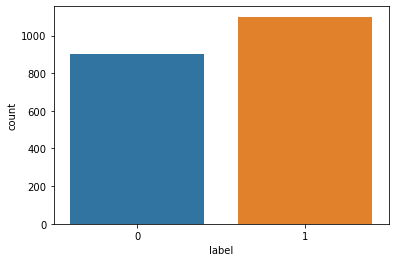

In [11]:
sns.countplot(x=y_test);

In [23]:
import xgboost as xgb
from optuna import create_study, logging
from optuna.pruners import MedianPruner
from optuna.integration import XGBoostPruningCallback


def objective(trial, X, y, group, score, params=dict()):
    dtrain = xgb.DMatrix(X, label=y)
    class_weight = (y.shape[0] - np.sum(y)) / np.sum(y)
    
    ## Initial Learning Parameters
    params['learning_rate'] = 0.1
    params['num_boost_round'] = 1000

    if group == '1':
        params['max_depth'] = trial.suggest_int('max_depth', 2, 10)
        params['min_child_weight'] = trial.suggest_loguniform('min_child_weight',
                                                              1e-10, 1e10)
    
    if group == '2':
        params['subsample'] = trial.suggest_uniform('subsample', 0, 1)
        params['colsample_bytree'] = trial.suggest_uniform('colsample_bytree', 0, 1)
    
    if group == '3':
        params['learning_rate'] = trial.suggest_uniform('learning_rate', 0, 0.1)
        params['num_boost_round'] = trial.suggest_int('num_boost_round', 100, 1000)

    pruning_callback = XGBoostPruningCallback(trial, "test-" + score.__name__)
    cv_scores = xgb.cv(params, dtrain, nfold=5,
                       stratified=True,
                       feval=score,
                       early_stopping_rounds=10,
                       callbacks=[pruning_callback],
                       seed=0)

    return cv_scores['test-' + score.__name__ + '-mean'].values[-1]


def execute_optimization(study_name, group, score, trials,
                         params=dict(), direction='maximize'):
    logging.set_verbosity(logging.ERROR)
    
    ## We use pruner to skip trials that are NOT fruitful
    pruner = MedianPruner(n_warmup_steps=5)
    
    study = create_study(direction=direction,
                         study_name=study_name,
                         storage='sqlite:///optuna.db',
                         load_if_exists=True,
                         pruner=pruner)

    study.optimize(lambda trial: objective(trial, x_train, y_train,
                                           group, score, params),
                   n_trials=trials,
                   n_jobs=-1)
    
    
    print("STUDY NAME: ", study_name)
    print('------------------------------------------------')
    print("EVALUATION METRIC: ", score.__name__)
    print('------------------------------------------------')
    print("BEST CV SCORE", study.best_value)
    print('------------------------------------------------')
    print(f"OPTIMAL GROUP - {group} PARAMS: ", study.best_params)
    print('------------------------------------------------')
    print("BEST TRIAL", study.best_trial)
    print('------------------------------------------------')
    
    
    return study.best_params

In [30]:
from sklearn import metrics

score_func = metrics.f1_score
def score_function(y_pred, dtrain):
    y_pred = (y_pred > 0.5).astype(int)
    y_true = (dtrain.get_label() > 0.5).astype(int)
    return score_func.__name__, score_func(y_true, y_pred)

score_function.__name__ = score_func.__name__

In [31]:
def stepwise_optimization(trials=10):
    final_params = dict()
    for g in ['1', '2', '3']:
        print(f"=========================== Optimizing Group - {g} ============================")
        update_params = execute_optimization('xgboost', g, score_function, trials,
                                             params=final_params, direction='maximize')
        final_params.update(update_params)
        print(f"PARAMS after optimizing GROUP - {g}: ", final_params)
        print()
        print()

    print("=========================== FINAL OPTIMAL PARAMETERS ============================")
    print(final_params)
    
    return final_params

In [32]:
params = stepwise_optimization()

=========================== Optimizing Group - 1 ============================


C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


STUDY NAME:  xgboost
------------------------------------------------
EVALUATION METRIC:  f1_score
------------------------------------------------
BEST CV SCORE 0.8477459999999999
------------------------------------------------
OPTIMAL GROUP - 1 PARAMS:  {'max_depth': 8, 'min_child_weight': 0.19108967203247829}
------------------------------------------------
BEST TRIAL FrozenTrial(number=7, values=[0.8477459999999999], datetime_start=datetime.datetime(2021, 10, 10, 17, 16, 2, 193173), datetime_complete=datetime.datetime(2021, 10, 10, 17, 16, 11, 747320), params={'max_depth': 8, 'min_child_weight': 0.19108967203247829}, distributions={'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.8330338000000002, 1: 0.8403984, 2: 0.841747, 3: 0.842189, 4: 0.8445784, 5: 0.8458249999999999, 6: 0.8444423999999999, 7: 0.8451090000000001, 8: 0.84790579999999

C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


STUDY NAME:  xgboost
------------------------------------------------
EVALUATION METRIC:  f1_score
------------------------------------------------
BEST CV SCORE 0.8811481999999999
------------------------------------------------
OPTIMAL GROUP - 2 PARAMS:  {'colsample_bytree': 0.44497825056910023, 'subsample': 0.6468421718670492}
------------------------------------------------
BEST TRIAL FrozenTrial(number=18, values=[0.8811481999999999], datetime_start=datetime.datetime(2021, 10, 10, 17, 16, 12, 12382), datetime_complete=datetime.datetime(2021, 10, 10, 17, 16, 24, 804760), params={'colsample_bytree': 0.44497825056910023, 'subsample': 0.6468421718670492}, distributions={'colsample_bytree': UniformDistribution(high=1.0, low=0.0), 'subsample': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.8330605999999999, 1: 0.8435392, 2: 0.8551082000000001, 3: 0.8620654, 4: 0.8663373999999999, 5: 0.8697239999999999, 6: 0.8731043999999999, 7: 0.87527

C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


STUDY NAME:  xgboost
------------------------------------------------
EVALUATION METRIC:  f1_score
------------------------------------------------
BEST CV SCORE 0.8811481999999999
------------------------------------------------
OPTIMAL GROUP - 3 PARAMS:  {'colsample_bytree': 0.44497825056910023, 'subsample': 0.6468421718670492}
------------------------------------------------
BEST TRIAL FrozenTrial(number=18, values=[0.8811481999999999], datetime_start=datetime.datetime(2021, 10, 10, 17, 16, 12, 12382), datetime_complete=datetime.datetime(2021, 10, 10, 17, 16, 24, 804760), params={'colsample_bytree': 0.44497825056910023, 'subsample': 0.6468421718670492}, distributions={'colsample_bytree': UniformDistribution(high=1.0, low=0.0), 'subsample': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.8330605999999999, 1: 0.8435392, 2: 0.8551082000000001, 3: 0.8620654, 4: 0.8663373999999999, 5: 0.8697239999999999, 6: 0.8731043999999999, 7: 0.87527

In [35]:
params

{'learning_rate': 0.05431902646828189,
 'num_boost_round': 927,
 'max_depth': 8,
 'min_child_weight': 0.19108967203247829,
 'subsample': 0.6468421718670492,
 'colsample_bytree': 0.44497825056910023}

In [36]:
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

In [49]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [38]:
def report(clf, x_train, y_train, x_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                      sample_weight=sample_weight,
                                      refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_probs)
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions),
                                      func(y_test, test_predictions)]
        
    ## Model Memory
    model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [40]:
primary_eval_metric = metrics.f1_score

In [44]:
feature_names = numeric_columns

In [47]:
confusion_lbs = ['0', '1']

In [57]:
import timeit
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
import pickle
import sys

In [58]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))

In [60]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [62]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [64]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs,
                                 drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [66]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.44497825056910023, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05431902646828189, max_delta_step=0, m

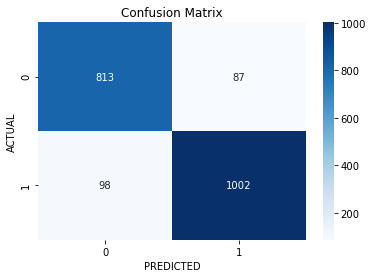


=======================================> PLOTS <=========================================


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


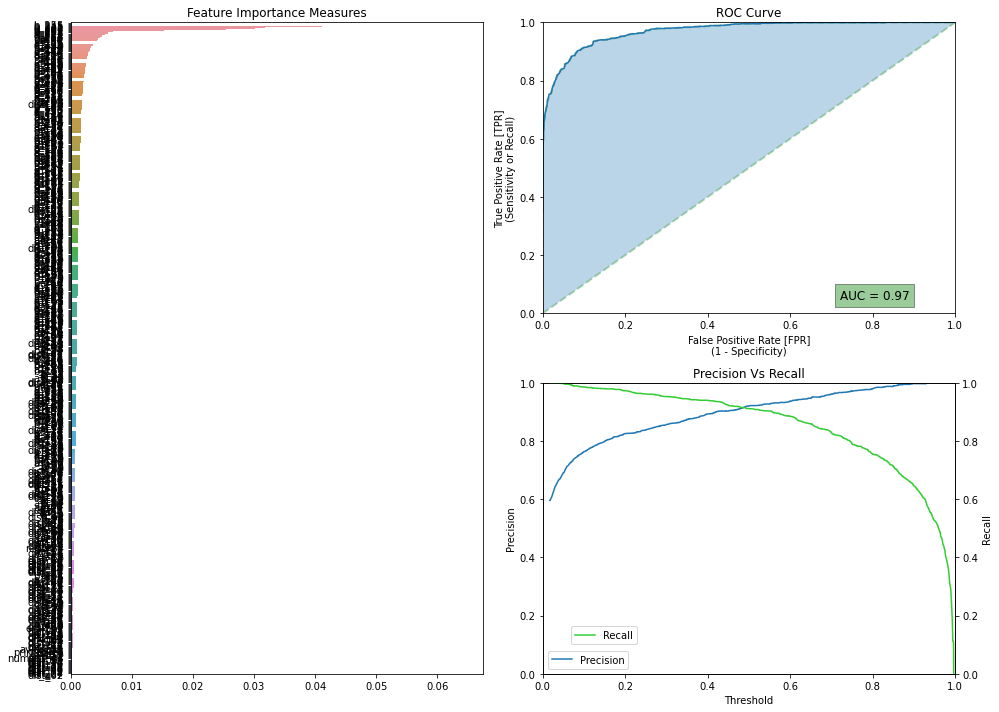

In [67]:
from xgboost import XGBClassifier

xgb_clf_tuned_1 = XGBClassifier(**params, scale_pos_weight=cls_weight,
                                random_state=0, n_jobs=-1)
xgb_clf_tuned_1.fit(x_train, y_train);

xgb_clf_tuned_1, xgb_report_tuned_1 = report(xgb_clf_tuned_1, x_train, y_train,
                                             x_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

In [68]:
params = stepwise_optimization(trials=50)

=========================== Optimizing Group - 1 ============================


C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


STUDY NAME:  xgboost
------------------------------------------------
EVALUATION METRIC:  f1_score
------------------------------------------------
BEST CV SCORE 0.886425
------------------------------------------------
OPTIMAL GROUP - 1 PARAMS:  {'max_depth': 2, 'min_child_weight': 3.00886265711383e-10}
------------------------------------------------
BEST TRIAL FrozenTrial(number=30, values=[0.886425], datetime_start=datetime.datetime(2021, 10, 10, 17, 30, 58, 717510), datetime_complete=datetime.datetime(2021, 10, 10, 17, 32, 10, 92588), params={'max_depth': 2, 'min_child_weight': 3.00886265711383e-10}, distributions={'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.8549521999999999, 1: 0.8657684, 2: 0.8755534, 3: 0.8766474000000001, 4: 0.8783842, 5: 0.8831764, 6: 0.883845, 7: 0.8860250000000001, 8: 0.8863306, 9: 0.886425}, trial_id=31, sta

C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


STUDY NAME:  xgboost
------------------------------------------------
EVALUATION METRIC:  f1_score
------------------------------------------------
BEST CV SCORE 0.886425
------------------------------------------------
OPTIMAL GROUP - 2 PARAMS:  {'max_depth': 2, 'min_child_weight': 3.00886265711383e-10}
------------------------------------------------
BEST TRIAL FrozenTrial(number=30, values=[0.886425], datetime_start=datetime.datetime(2021, 10, 10, 17, 30, 58, 717510), datetime_complete=datetime.datetime(2021, 10, 10, 17, 32, 10, 92588), params={'max_depth': 2, 'min_child_weight': 3.00886265711383e-10}, distributions={'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.8549521999999999, 1: 0.8657684, 2: 0.8755534, 3: 0.8766474000000001, 4: 0.8783842, 5: 0.8831764, 6: 0.883845, 7: 0.8860250000000001, 8: 0.8863306, 9: 0.886425}, trial_id=31, sta

C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


STUDY NAME:  xgboost
------------------------------------------------
EVALUATION METRIC:  f1_score
------------------------------------------------
BEST CV SCORE 0.886425
------------------------------------------------
OPTIMAL GROUP - 3 PARAMS:  {'max_depth': 2, 'min_child_weight': 3.00886265711383e-10}
------------------------------------------------
BEST TRIAL FrozenTrial(number=30, values=[0.886425], datetime_start=datetime.datetime(2021, 10, 10, 17, 30, 58, 717510), datetime_complete=datetime.datetime(2021, 10, 10, 17, 32, 10, 92588), params={'max_depth': 2, 'min_child_weight': 3.00886265711383e-10}, distributions={'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.8549521999999999, 1: 0.8657684, 2: 0.8755534, 3: 0.8766474000000001, 4: 0.8783842, 5: 0.8831764, 6: 0.883845, 7: 0.8860250000000001, 8: 0.8863306, 9: 0.886425}, trial_id=31, sta

In [69]:
params

{'learning_rate': 0.08293711096522999,
 'num_boost_round': 667,
 'max_depth': 2,
 'min_child_weight': 3.00886265711383e-10,
 'subsample': 0.3496806730740519,
 'colsample_bytree': 0.37177984549622567}

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.37177984549622567, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.08293711096522999, max_delta_step=0, m

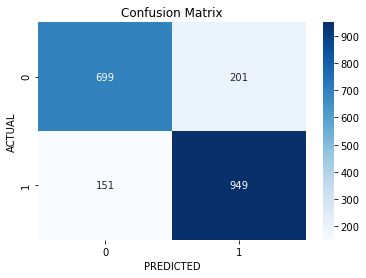


=======================================> PLOTS <=========================================


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


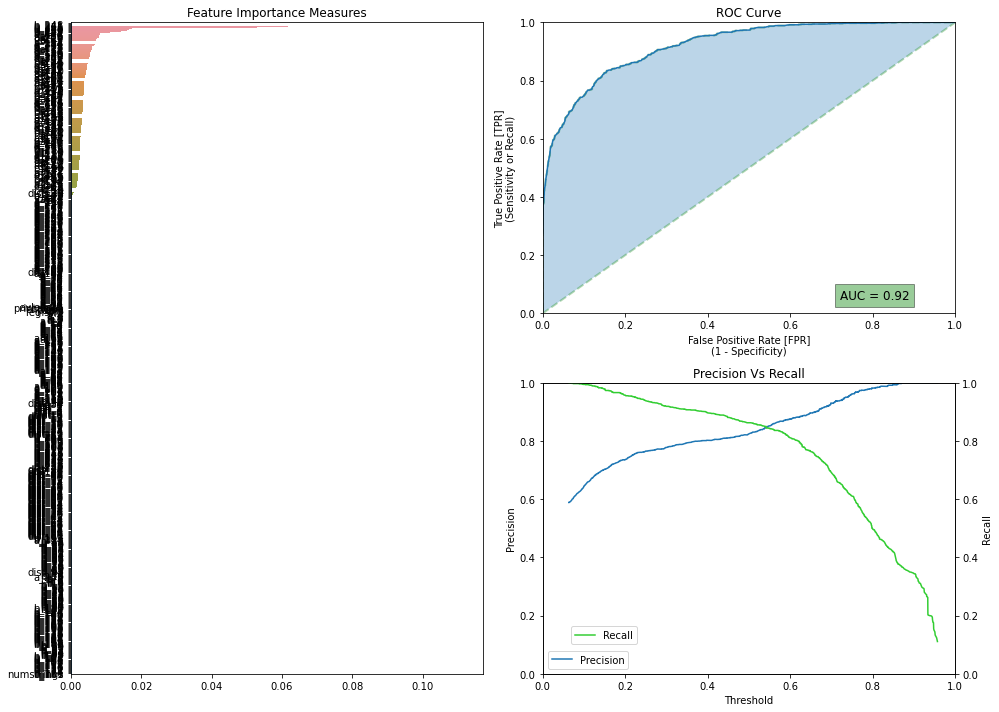

In [70]:
xgb_clf_tuned_2 = XGBClassifier(**params, scale_pos_weight=cls_weight,
                                random_state=0, n_jobs=-1)
xgb_clf_tuned_2.fit(x_train, y_train);

xgb_clf_tuned_2, xgb_report_tuned_2 = report(xgb_clf_tuned_2, x_train, y_train,
                                             x_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.8181818181818182,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

=============================> TRAIN-TEST DETAILS <========================

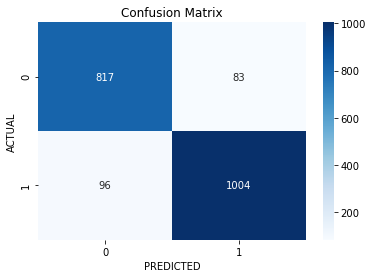


=======================================> PLOTS <=========================================


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


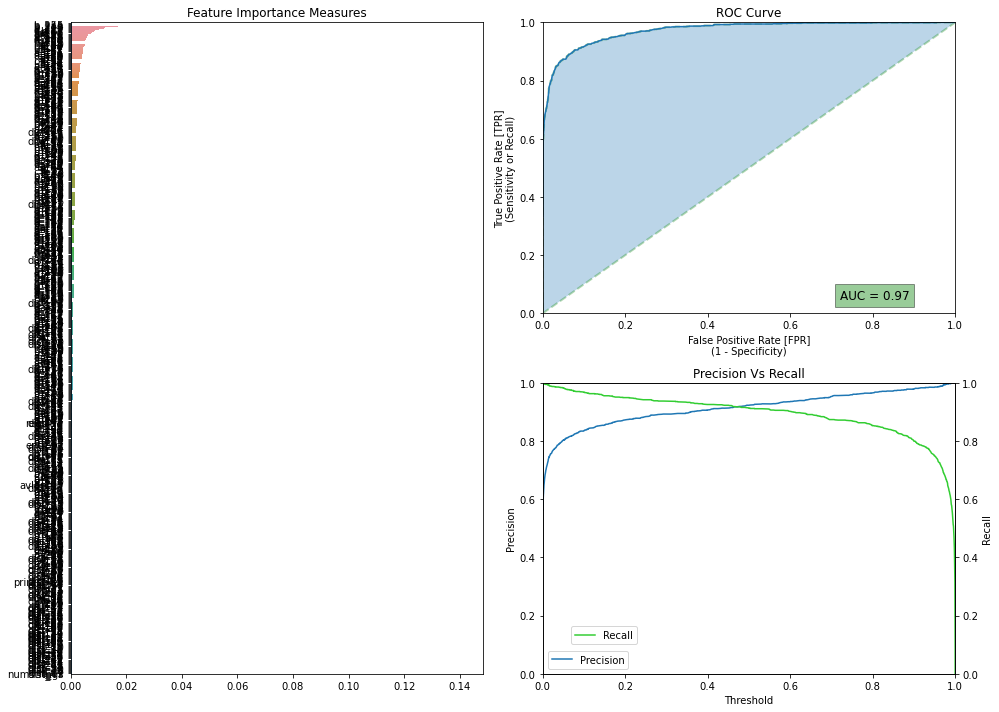

In [72]:
xgb_clf_default = XGBClassifier(scale_pos_weight=cls_weight,
                                random_state=0, n_jobs=-1)
xgb_clf_default.fit(x_train, y_train);

xgb_clf_default, xgb_report_default = report(xgb_clf_default, x_train, y_train,
                                             x_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

In [73]:
report_list = [xgb_report_default, xgb_report_tuned_1, xgb_report_tuned_2]
clf_labels = ['XGBoost with default params',
              'XGBoost after 10 trials',
              'XGBoost after 50 more trials',]

In [75]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='accuracy'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], roc_auc] + \
                              true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig



In [76]:
compare_table, compare_plot = compare_models(y_test, clf_reports=report_list,
                                             labels=clf_labels,
                                             score=primary_eval_metric.__name__)

compare_table

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Train f1_score,Test f1_score,Overfitting,ROC Area,Precision,Recall,F1-score,Support
XGBoost with default params,1,0.918,True,0.972567,0.923643,0.912727,0.918153,1100
XGBoost after 10 trials,0.991,0.915,True,0.970311,0.92011,0.910909,0.915487,1100
XGBoost after 50 more trials,0.856,0.844,True,0.92081,0.825217,0.862727,0.843556,1100
